# Unemployment Rate Analysis During COVID-19

## 1. Introduction
- Brief about unemployment measurement
- COVID-19 impact context
- Project objectives

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Data
df = pd.read_csv("Unemployment in India.csv")

In [5]:
# Initial inspection
print("Dataset Information:")
df.info()
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nStatistical Summary:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB

First few rows of the dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3

Data Preprocessing......

In [ ]:
df.columns = df.columns.str.strip().str.lower()

# Convert date column (now 'date')
df['date'] = pd.to_datetime(df['date'])

# Create COVID period flag
covid_start = pd.to_datetime('2020-03-01')
df['covid_period'] = np.where(df['date'] >= covid_start, 'During COVID', 'Pre-COVID')

# Handle missing values
df = df.dropna(subset=['estimated unemployment rate (%)'])

C:\Users\ciphe\AppData\Local\Temp\ipykernel_5348\2964913136.py:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


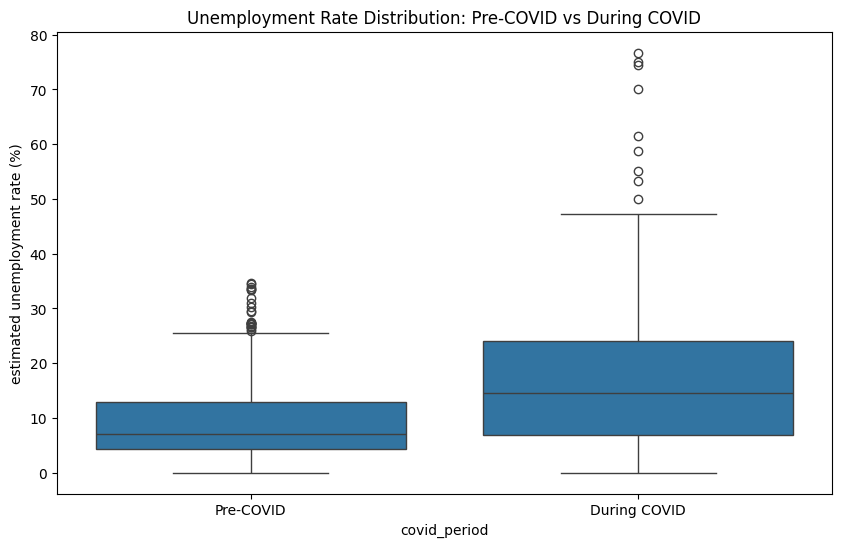

Pre-COVID Average: 9.51%
During COVID Average: 17.77%
Increase: 86.91%


In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='covid_period', y='estimated unemployment rate (%)', data=df)
plt.title('Unemployment Rate Distribution: Pre-COVID vs During COVID')
plt.show()

# Statistical comparison
pre_covid = df[df['covid_period'] == 'Pre-COVID']['estimated unemployment rate (%)']
during_covid = df[df['covid_period'] == 'During COVID']['estimated unemployment rate (%)']

print(f"Pre-COVID Average: {pre_covid.mean():.2f}%")
print(f"During COVID Average: {during_covid.mean():.2f}%")
print(f"Increase: {(during_covid.mean()/pre_covid.mean()-1)*100:.2f}%")

Impact Analysis......

C:\Users\ciphe\AppData\Local\Temp\ipykernel_5348\2306449482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month


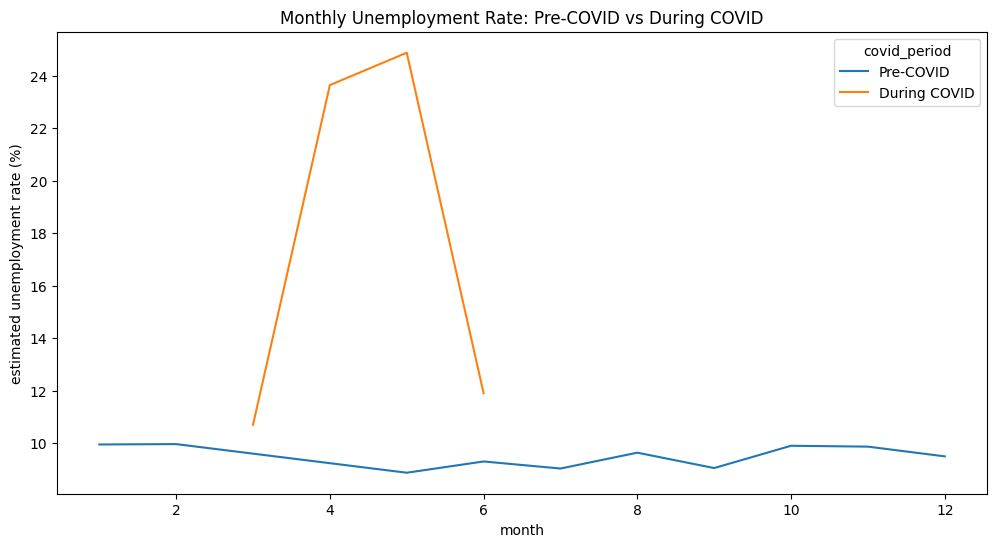

In [19]:
df['month'] = df['date'].dt.month
monthly_comparison = df.groupby(['month', 'covid_period'])['estimated unemployment rate (%)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='estimated unemployment rate (%)', hue='covid_period', data=monthly_comparison)
plt.title('Monthly Unemployment Rate: Pre-COVID vs During COVID')
plt.show()

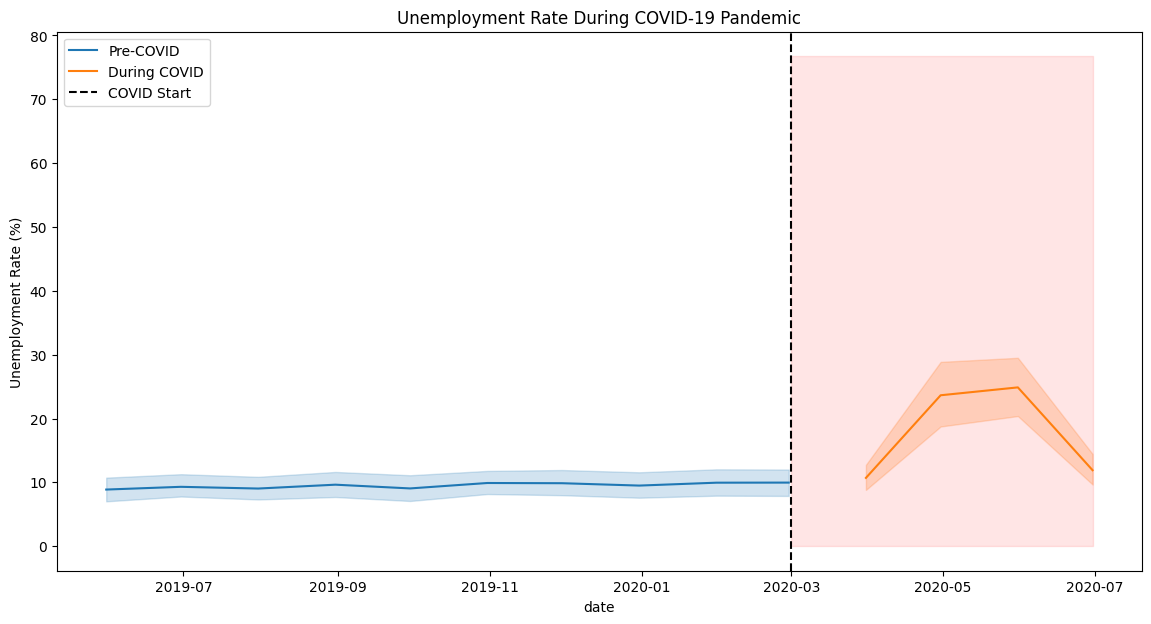

In [21]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='estimated unemployment rate (%)', data=df, hue='covid_period')
plt.axvline(covid_start, color='black', linestyle='--', label='COVID Start')
plt.fill_betweenx(y=[df['estimated unemployment rate (%)'].min(), df['estimated unemployment rate (%)'].max()],
                  x1=covid_start, x2=df['date'].max(), alpha=0.1, color='red')
plt.title('Unemployment Rate During COVID-19 Pandemic')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()